## Deep Neural Network for MNIST Dataset

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow.keras as keras

2021-11-02 13:50:21.973578: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-02 13:50:21.973661: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Loading MNIST dataset from keras

In [2]:
mnist = keras.datasets.mnist.load_data()

In [4]:
(train_x_all, train_y_all), (test_x, test_y) = mnist
print(f'Shape of training data = {train_x_all.shape}')
print(f'Shape of testing data = {test_x.shape}')

Shape of training data = (60000, 28, 28)
Shape of testing data = (10000, 28, 28)


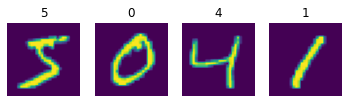

In [5]:
fig, ax =  plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(train_x_all[i])
    ax[i].set_title(train_y_all[i])
    ax[i].axis('off')
    

In [6]:
train_x = train_x_all/255.0
test_x =  test_x/255.0

In [7]:
model = keras.Sequential(name='mnist')
model.add(keras.layers.InputLayer(input_shape=(28, 28), name='Input'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax, name="Output"))
model.summary()

Model: "mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 32)            928       
_________________________________________________________________
Output (Dense)               (None, 28, 10)            330       
Total params: 1,258
Trainable params: 1,258
Non-trainable params: 0
_________________________________________________________________


2021-11-02 13:50:40.925914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-02 13:50:40.925958: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-02 13:50:40.925993: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ajay-pc): /proc/driver/nvidia/version does not exist
2021-11-02 13:50:40.926397: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(loss = keras.losses.categorical_crossentropy)

In [11]:
model.fit(train_x_all, train_y_all)

ValueError: in user code:

    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/ajay/my_projects/my_python_env/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 28, 10) are incompatible
